In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Đọc dữ liệu
data = pd.read_csv('Student_performance_data _.csv')

In [4]:
# Khám phá dữ liệu
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


In [6]:
print(data.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

In [7]:
# Xoá cột StudentID
if "StudentID" in data.columns:  
    data=data.drop("StudentID",axis=1)
data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [14]:
data.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


In [18]:
# Kiểm tra missing value
data.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [20]:
data['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

In [22]:
data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

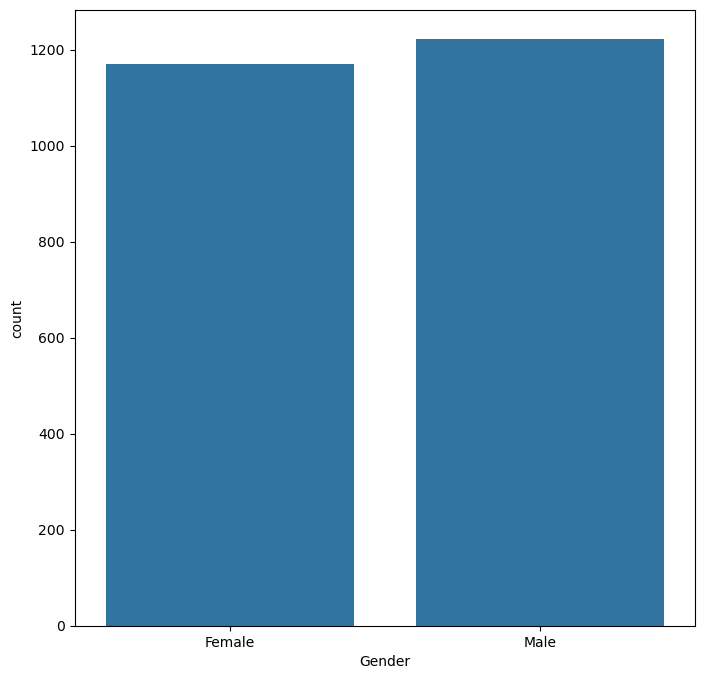

In [24]:
# Thống kê feature và trực quan hoá
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="Gender")
ax.set_xticklabels(['Female', 'Male'])

<Axes: xlabel='StudyTimeWeekly', ylabel='Count'>

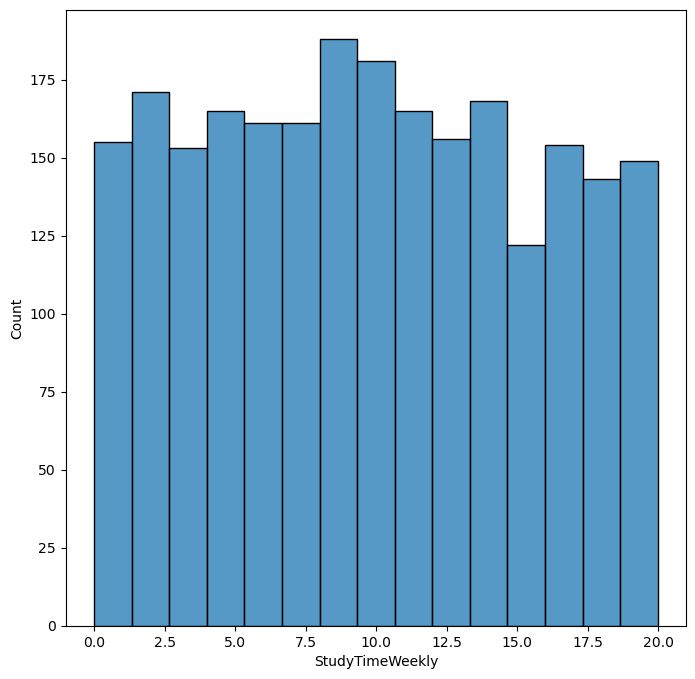

In [26]:
plt.figure(figsize=(8,8))
sns.histplot(data=data,x="StudyTimeWeekly")

[Text(0, 0, 'Caucasian'),
 Text(1, 0, 'African American'),
 Text(2, 0, 'Asian'),
 Text(3, 0, 'Other')]

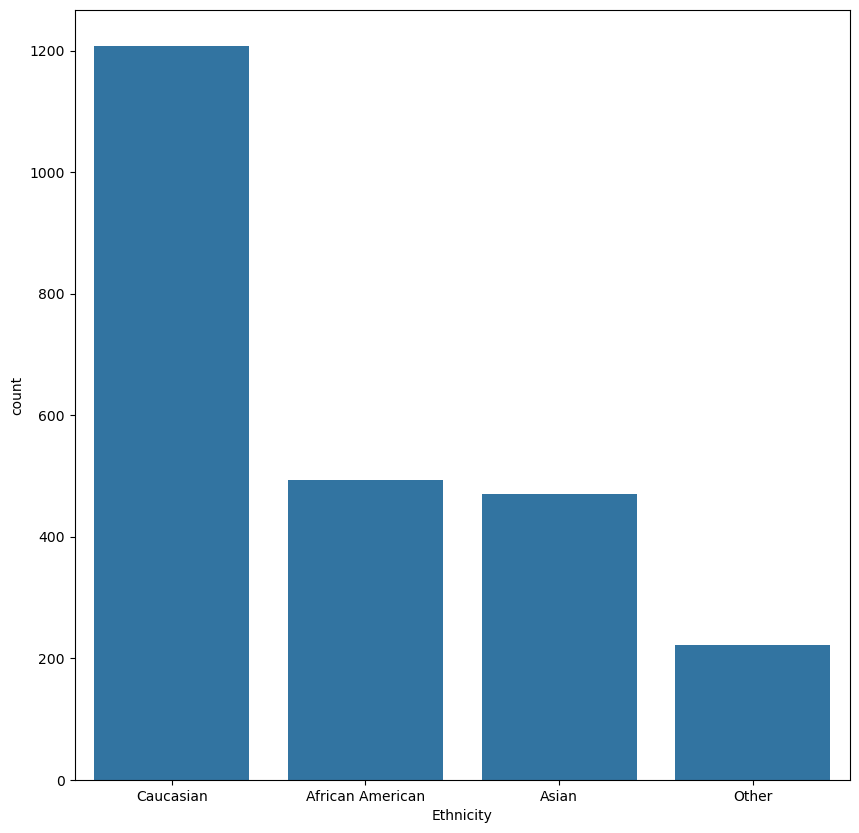

In [28]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=data,x="Ethnicity")
ax.set_xticklabels(['Caucasian', 'African American','Asian','Other'])

[Text(0, 0, '15'), Text(1, 0, '16'), Text(2, 0, '17'), Text(3, 0, '18')]

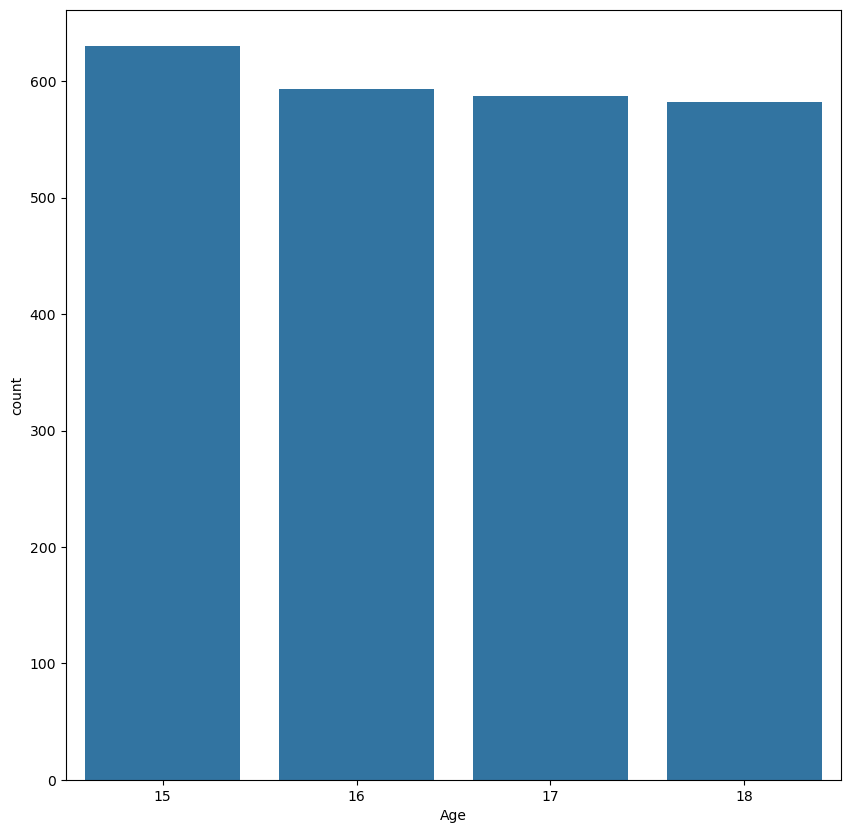

In [30]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=data,x="Age")
ax.set_xticklabels(['15', '16','17','18'])

[Text(0, 0, 'None'),
 Text(1, 0, 'High School'),
 Text(2, 0, 'Some College'),
 Text(3, 0, 'Bachelor'),
 Text(4, 0, 'Higher')]

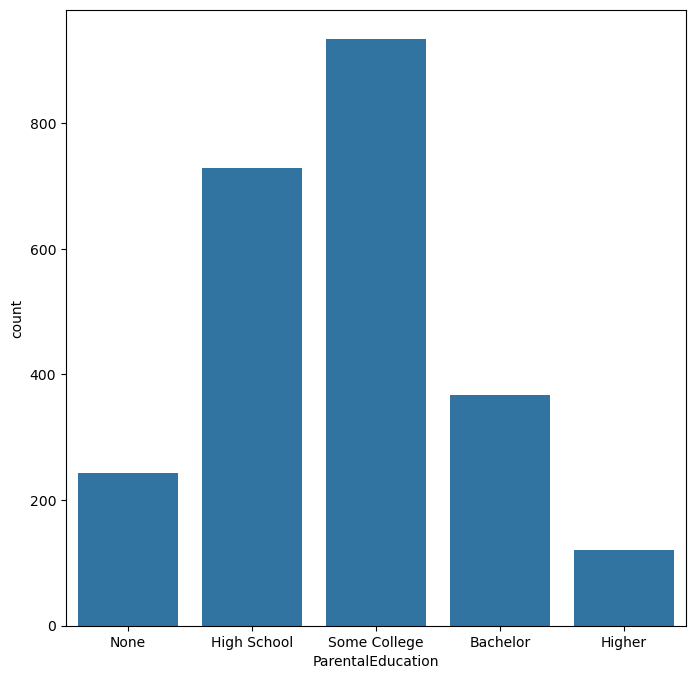

In [32]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="ParentalEducation")
ax.set_xticklabels(['None', 'High School','Some College','Bachelor','Higher'])

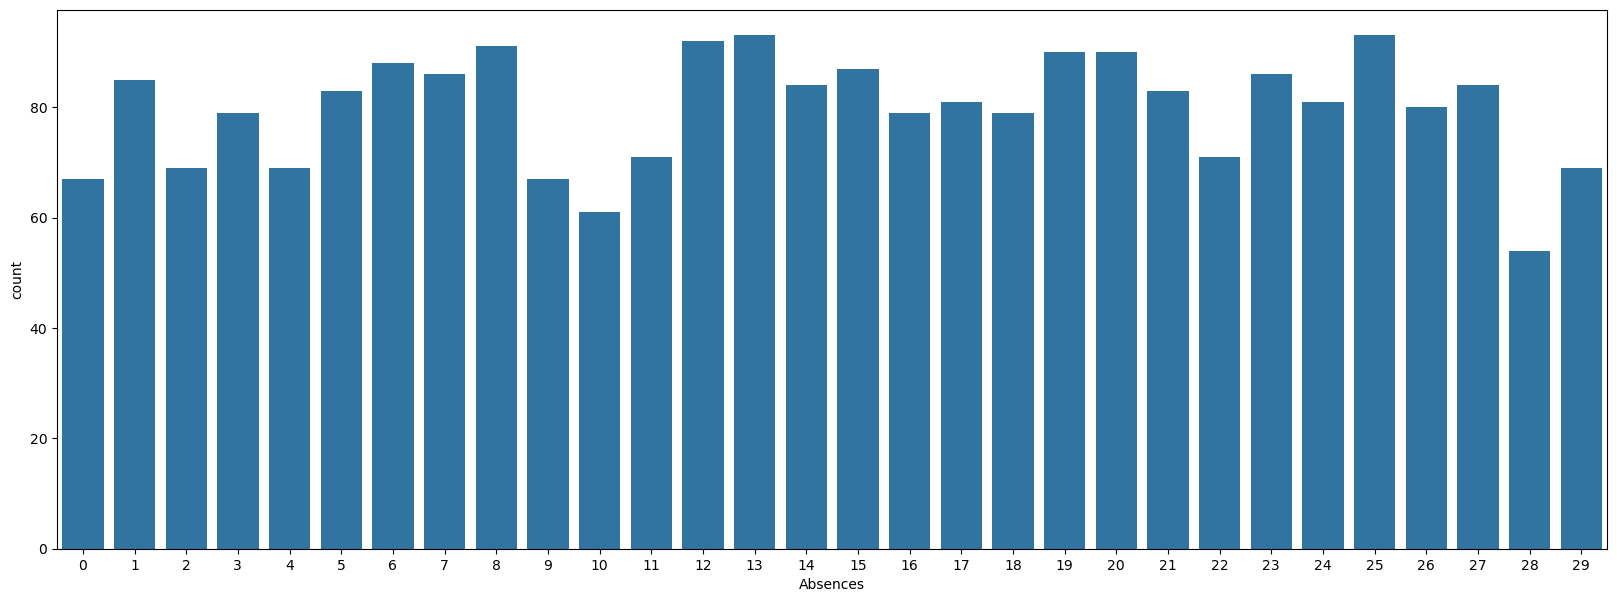

In [34]:
plt.figure(figsize=(20,7))
ax=sns.countplot(data=data,x="Absences")

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

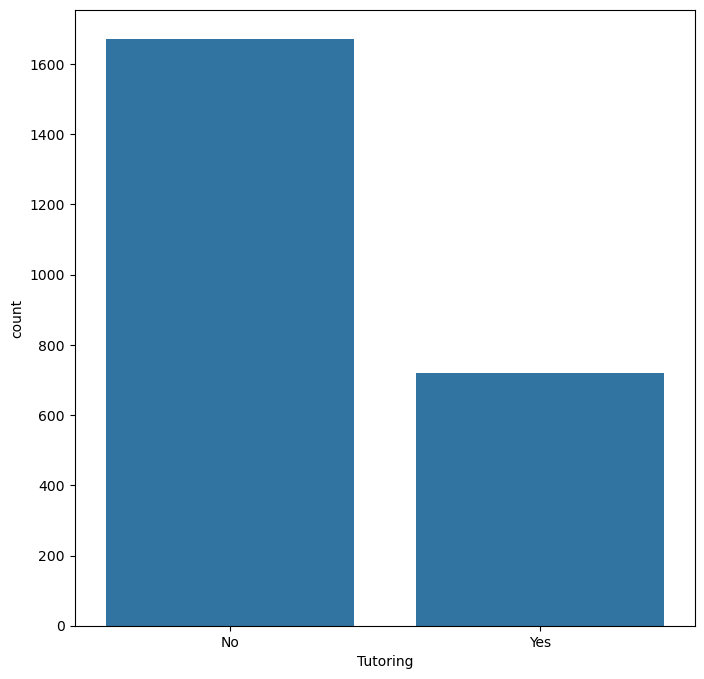

In [36]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="Tutoring")
ax.set_xticklabels(['No', 'Yes'])

[Text(0, 0, 'None'),
 Text(1, 0, 'Low'),
 Text(2, 0, 'Moderate'),
 Text(3, 0, 'High'),
 Text(4, 0, 'Very High')]

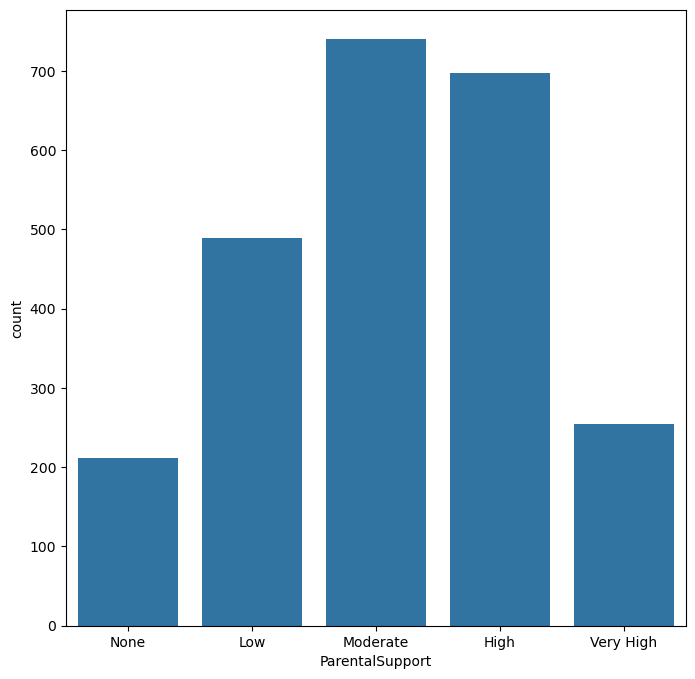

In [38]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="ParentalSupport")
ax.set_xticklabels(['None','Low','Moderate','High' ,'Very High'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

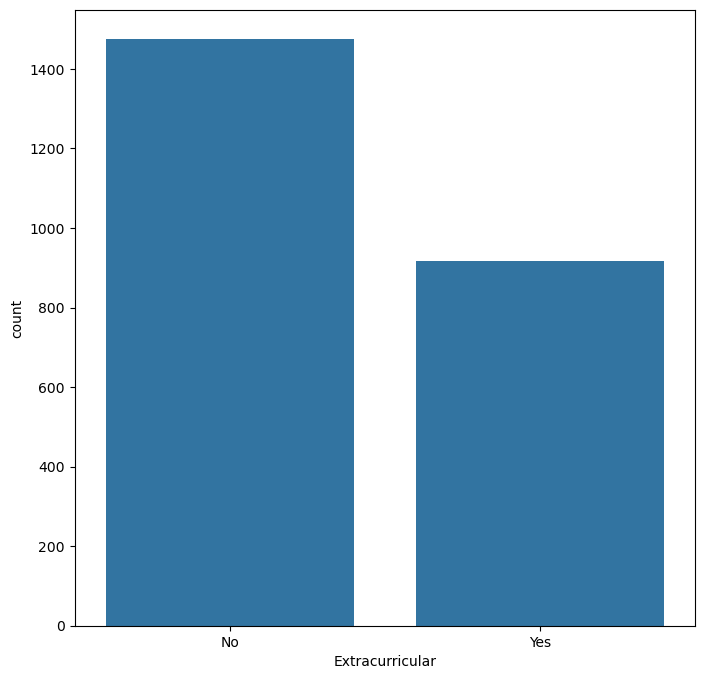

In [40]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="Extracurricular")
ax.set_xticklabels(['No', 'Yes'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

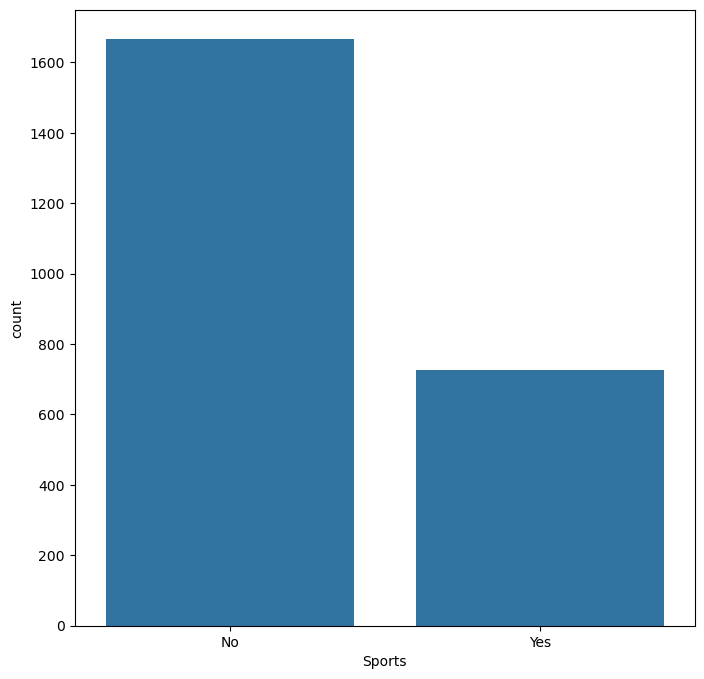

In [42]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="Sports")
ax.set_xticklabels(['No','Yes'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

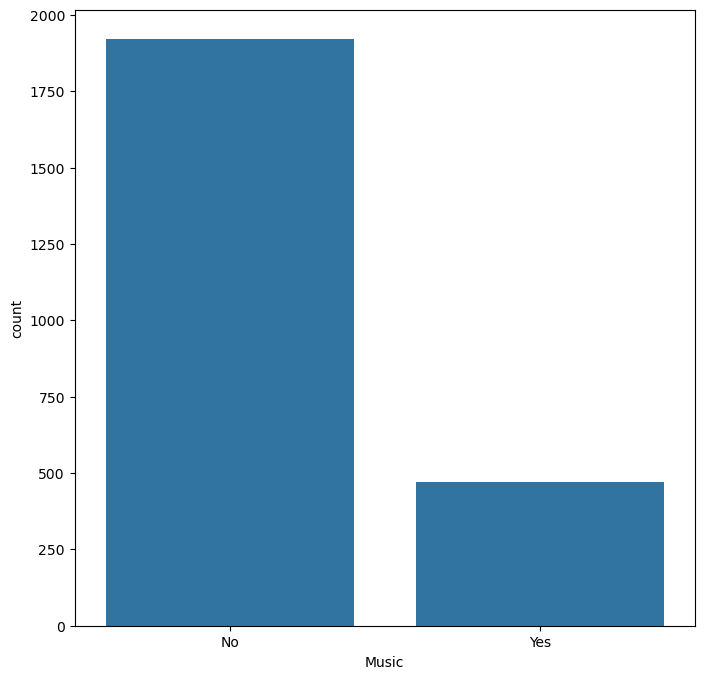

In [44]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="Music")
ax.set_xticklabels(['No','Yes'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

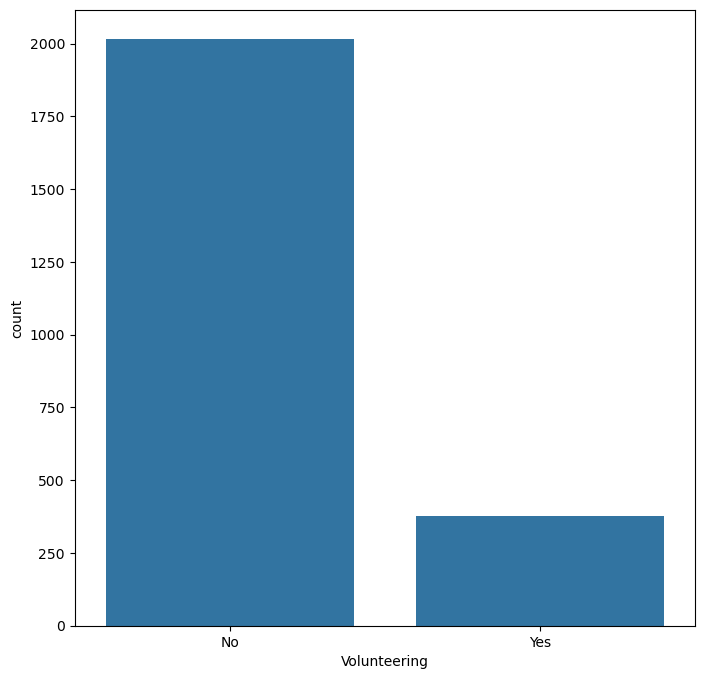

In [46]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="Volunteering")
ax.set_xticklabels(['No','Yes'])

[Text(0, 0, 'A'),
 Text(1, 0, 'B'),
 Text(2, 0, 'C'),
 Text(3, 0, 'D'),
 Text(4, 0, 'F')]

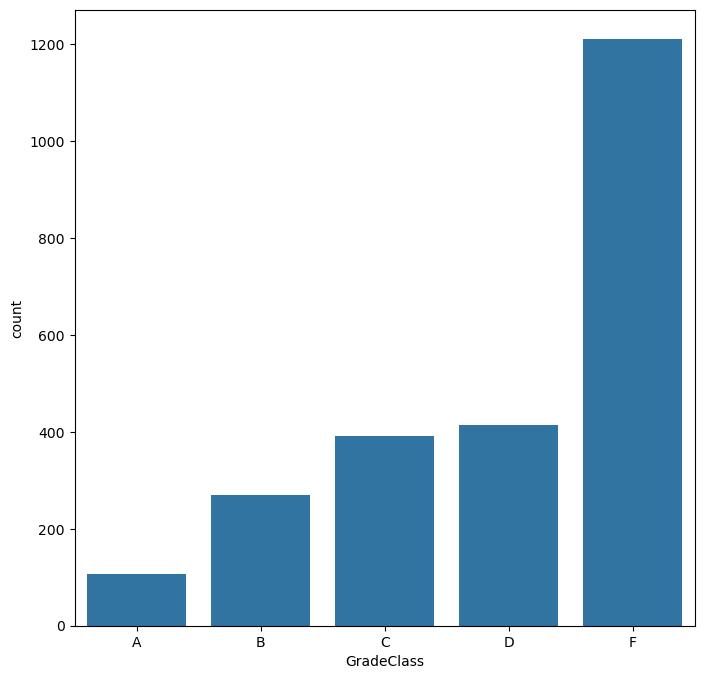

In [50]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=data,x="GradeClass")
ax.set_xticklabels(['A', 'B','C','D','F'])

In [61]:
# Mã hoá các đặc trưng phân loại
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

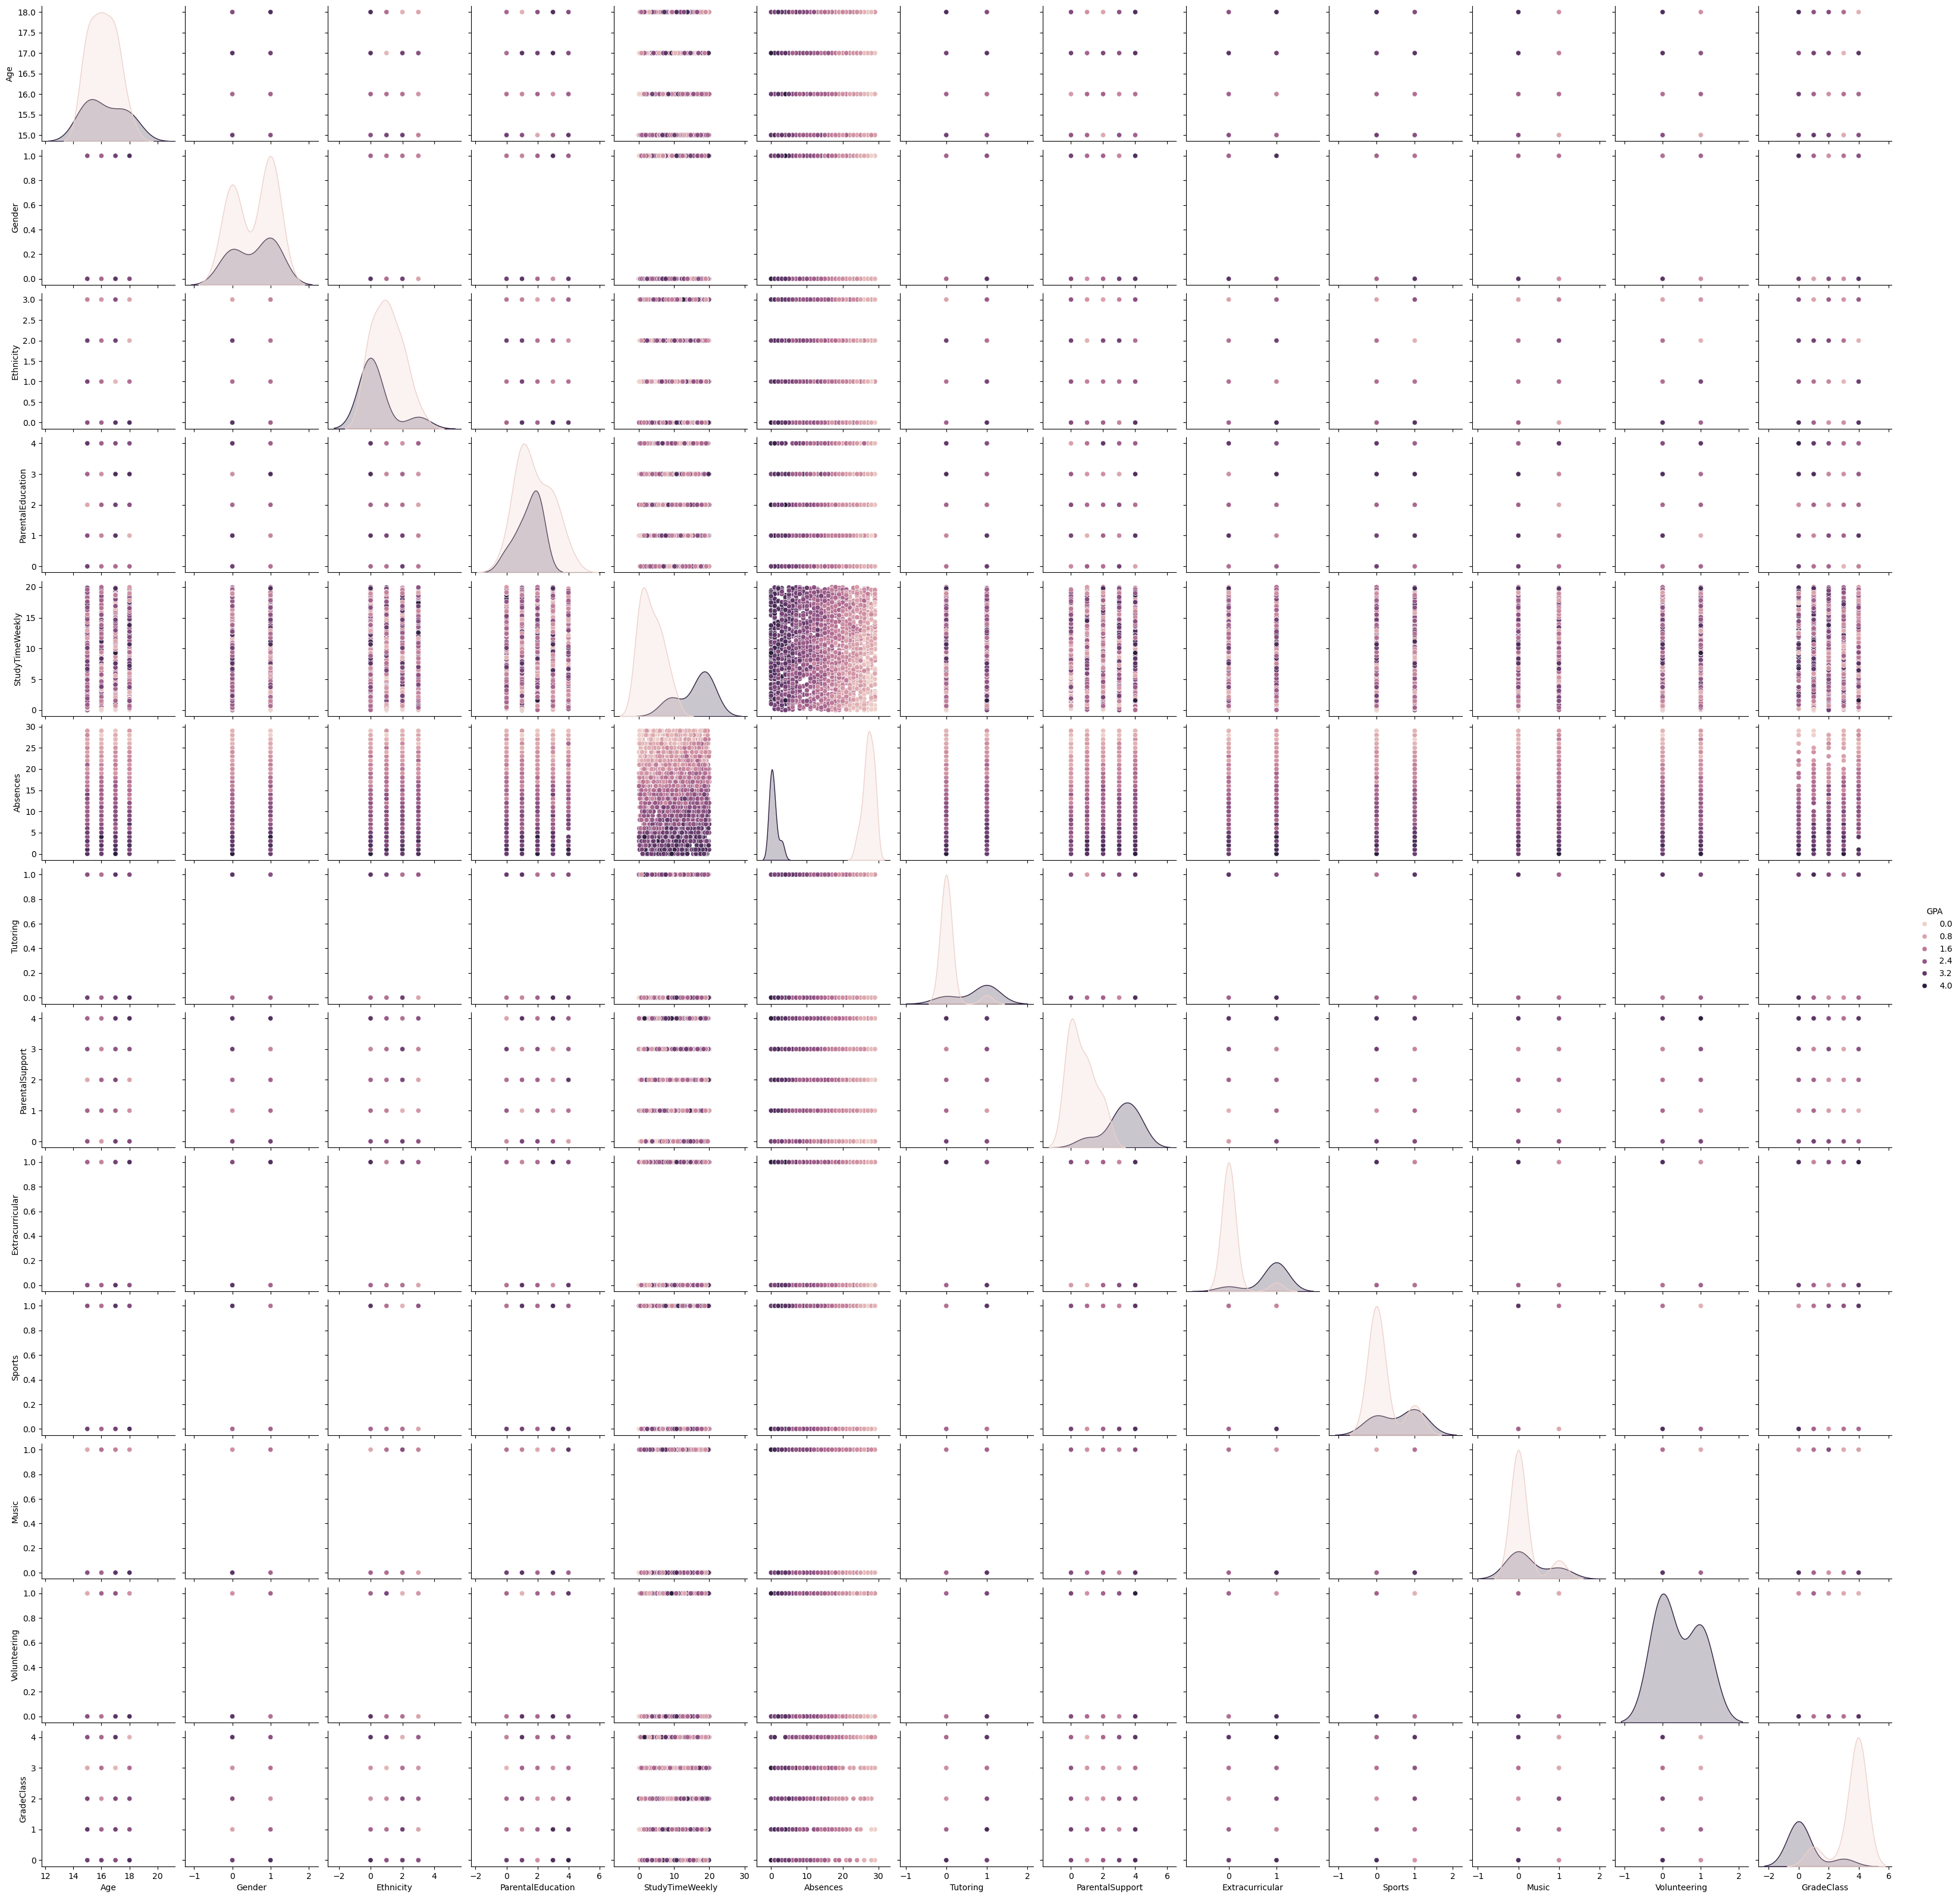

In [63]:
sns.pairplot(data, hue="GPA")
plt.show()

In [71]:
X = data.drop("GPA", axis=1)
y = data["GPA"]

In [75]:
# Chia tập huấn luyện, test --> Sử dụng Cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Sử dụng mô hình hồi quy tuyến tính để  huấn luyện tập dữ liệu huấn luyện
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lreg = linreg.predict(X_test)
print(y_pred_lreg)

[1.45668701 2.97467272 1.84163091 3.59943492 0.29233741 2.72028891
 1.64895453 2.29474018 2.11374243 1.01821133 2.57516291 0.63567488
 3.09118281 2.72672237 2.8609517  0.36508418 1.05830651 1.50022194
 2.00033398 2.64063157 2.1996975  1.58466702 1.66448234 3.34329182
 1.74910357 0.59594955 1.65024279 2.58004014 2.0354584  1.81984479
 1.93547202 0.74365367 3.01857342 3.21128145 1.42362239 1.84291084
 3.20905275 2.99229595 3.28866716 0.76565003 2.7157925  3.52405048
 1.15691942 2.23224862 0.92969945 2.57496342 2.98875023 1.09210157
 2.90375208 1.55007941 3.15470985 3.12763278 1.54550067 1.17460157
 1.72164161 3.48993434 2.55558042 3.36505424 1.03509208 2.08969469
 1.68416782 1.86889777 2.30386469 1.45449093 1.09609421 2.21107933
 3.27965739 2.57926605 1.09750775 3.51081946 3.57855426 0.91748724
 2.99540829 2.72848898 0.85043258 2.75194574 1.77512326 1.5543525
 0.25962616 1.44524293 1.89950698 3.01152936 2.11533283 1.55858207
 1.34994049 0.36540716 4.08772348 1.17827771 1.35822233 1.67174

In [83]:
# Sử dụng bài toán hồi quy để đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score
# Tính Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lreg)
print('Mean Squared Error:', mse)
# Tính giá trị R-squared 
r2 = r2_score(y_test, y_pred_lreg)
print('R-squared:', r2)

Mean Squared Error: 0.0356962806641217
R-squared: 0.9568329026350806


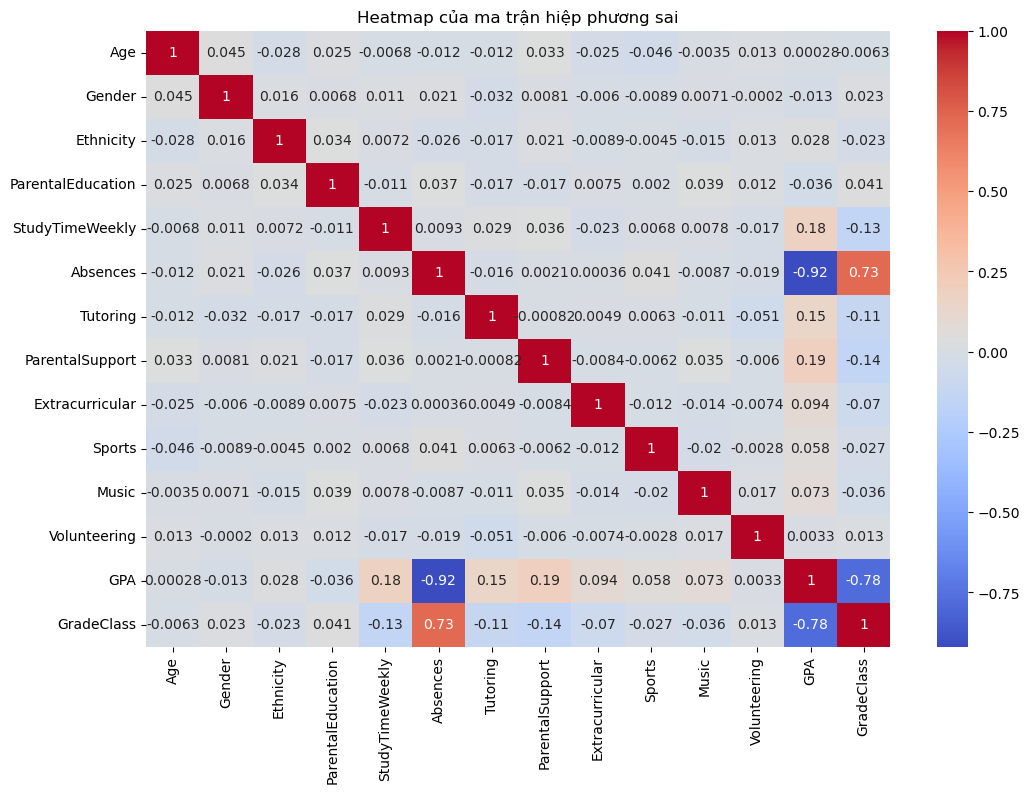

In [85]:
# Phân tích hệ số tương quan và biểu diễn ma trận hiệp phương sai
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap của ma trận hiệp phương sai')
plt.show()